In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [3]:
df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [4]:
df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [5]:
df.shape

(3182, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [7]:
df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [8]:
time = pd.date_range(start='5/15/2020',periods=3182,freq='15min')
df['time_stamp'] = pd.DataFrame(time)
df.drop(['DATE_TIME','PLANT_ID','SOURCE_KEY'],axis=1,inplace=True)
df = df.set_index('time_stamp')

In [9]:
df = df[['AMBIENT_TEMPERATURE']]

In [10]:
df.head()

,AMBIENT_TEMPERATURE
time_stamp,
2020-05-15 00:00:00,25.184316
2020-05-15 00:15:00,25.084589
2020-05-15 00:30:00,24.935753
2020-05-15 00:45:00,24.846130
2020-05-15 01:00:00,24.621525


In [11]:
df.tail()

,AMBIENT_TEMPERATURE
time_stamp,
2020-06-17 02:15:00,22.150570
2020-06-17 02:30:00,22.129816
2020-06-17 02:45:00,22.008275
2020-06-17 03:00:00,21.969495
2020-06-17 03:15:00,21.909288


In [12]:
df

,AMBIENT_TEMPERATURE
time_stamp,
2020-05-15 00:00:00,25.184316
2020-05-15 00:15:00,25.084589
2020-05-15 00:30:00,24.935753
2020-05-15 00:45:00,24.846130
2020-05-15 01:00:00,24.621525
...,...
2020-06-17 02:15:00,22.150570
2020-06-17 02:30:00,22.129816
2020-06-17 02:45:00,22.008275


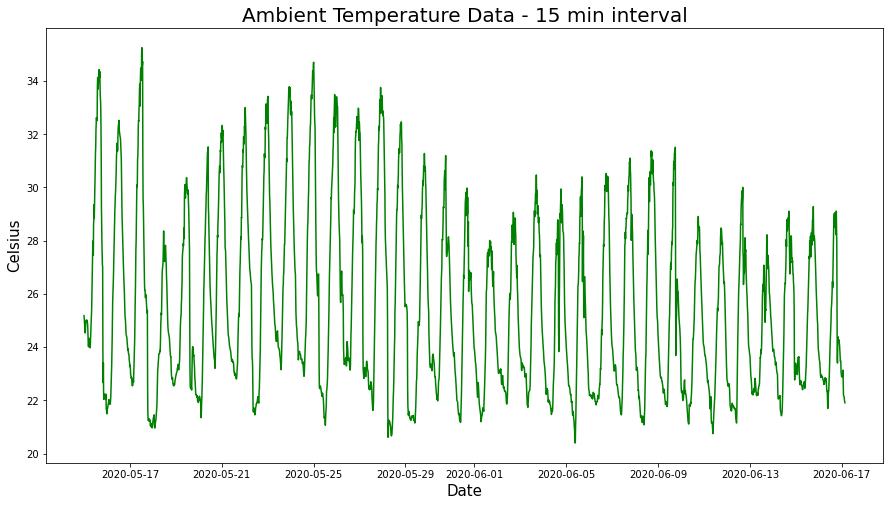

In [13]:
plt.plot(df,color='green')
plt.title('Ambient Temperature Data - 15 min interval',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Celsius',fontsize=15)
plt.show()

In [14]:
plt.rcParams['figure.figsize'] = [15,8]

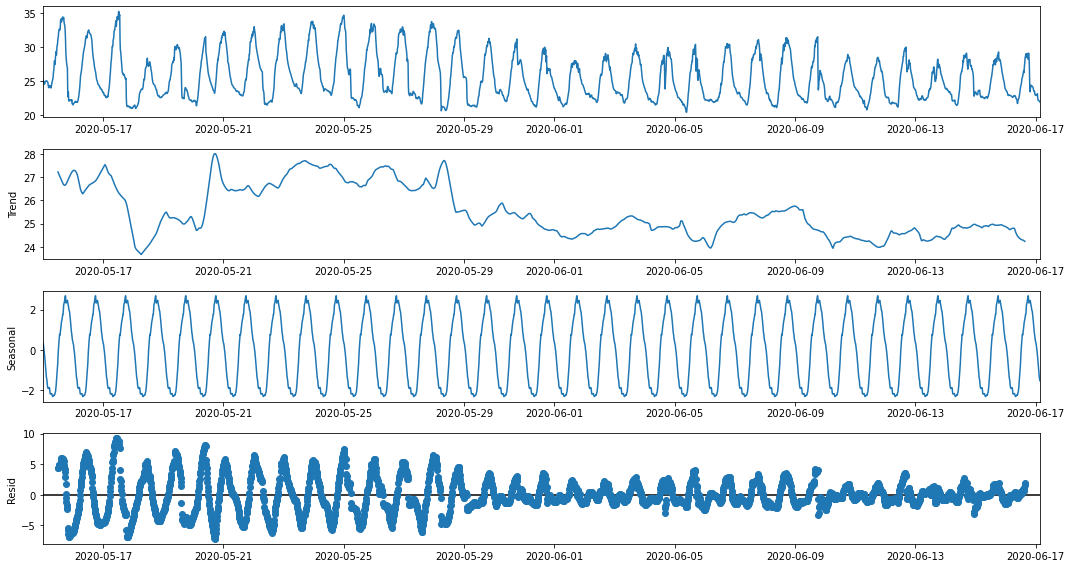

In [235]:
decomposition_model = seasonal_decompose(df,model='additive',period=decompfreq)
decomposition_model.plot();

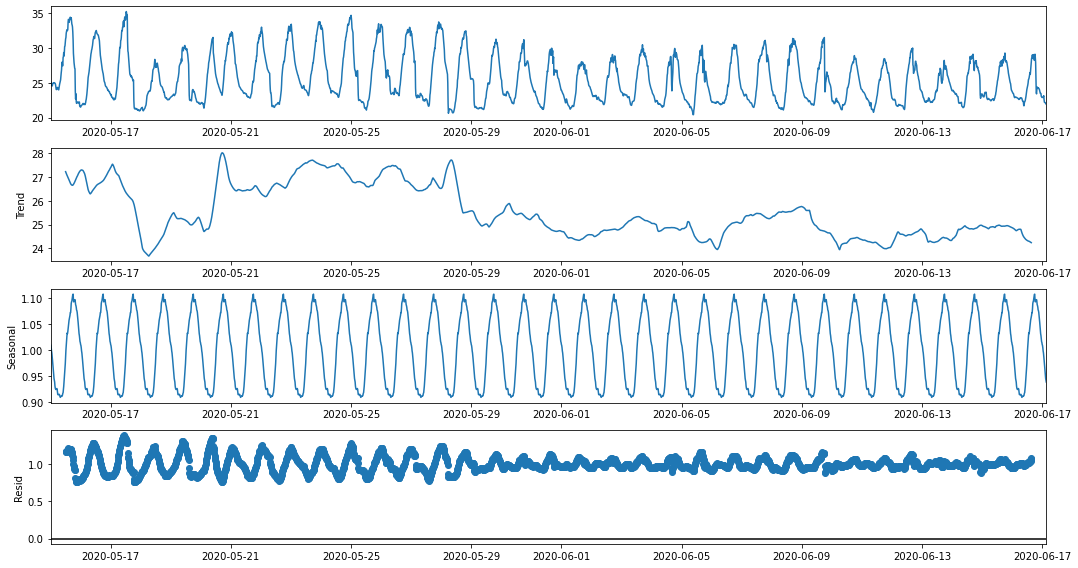

In [236]:
decomposition_model = seasonal_decompose(df,model='multiplicative',period=decompfreq)
decomposition_model.plot();

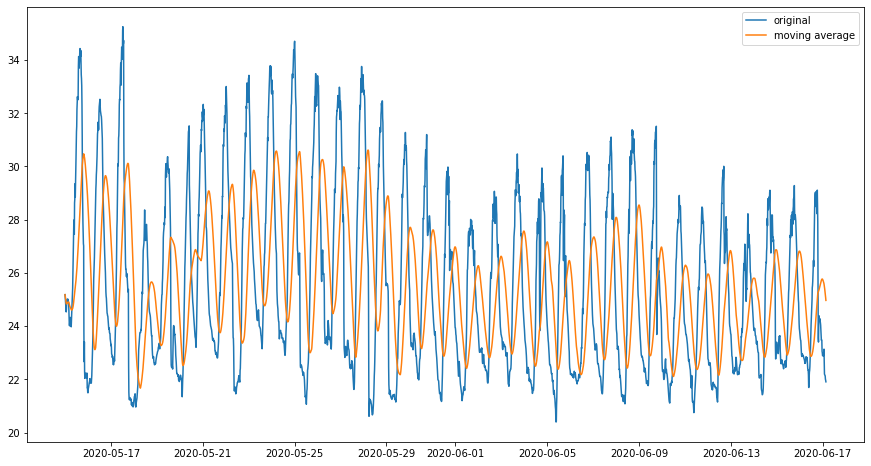

In [237]:
plt.plot(df,label='original')
plt.plot(df.rolling(50,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [238]:
# Model building - Exponential Smoothing Techniques

In [15]:
train = df.iloc[:2800]
test = df.iloc[2800:]

In [16]:
train.tail()

,AMBIENT_TEMPERATURE
time_stamp,
2020-06-13 02:45:00,22.334206
2020-06-13 03:00:00,22.237394
2020-06-13 03:15:00,22.205029
2020-06-13 03:30:00,22.309426
2020-06-13 03:45:00,22.283628


In [17]:
test.head()

,AMBIENT_TEMPERATURE
time_stamp,
2020-06-13 04:00:00,22.417261
2020-06-13 04:15:00,22.447643
2020-06-13 04:30:00,22.339699
2020-06-13 04:45:00,22.326316
2020-06-13 05:00:00,22.593207


In [18]:
len(train)

2800

In [19]:
len(test)

382

##### Simple Exponential Smoothing

In [20]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(optimized=True)
SES_model.summary()

Dep. Variable:,AMBIENT_TEMPERATURE,No. Observations:,2800
Model:,SimpleExpSmoothing,SSE,472.978
Optimized:,True,AIC,-4975.312
Trend:,None,BIC,-4963.438
Seasonal:,None,AICC,-4975.298
Seasonal Periods:,None,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,14:19:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,25.184315,l.0,True


In [21]:
SES_predict = SES_model.forecast(len(test))

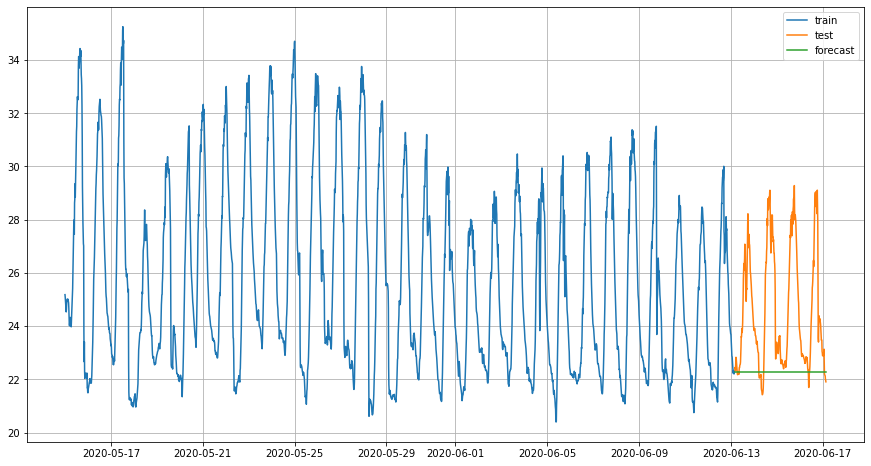

In [22]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [23]:
print("MAE:",MAE(test['AMBIENT_TEMPERATURE'],SES_predict))
print("MAPE:",MAPE(test['AMBIENT_TEMPERATURE'],SES_predict))

MAE: 2.3912105197034608
MAPE: 9.042080103016845


##### Double Exponential Smoothing

In [87]:
DES = Holt(train,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level = 0.5,
                   smoothing_trend = 0.36)
DES_model.summary()

Dep. Variable:,AMBIENT_TEMPERATURE,No. Observations:,2800
Model:,Holt,SSE,611.186
Optimized:,True,AIC,-4253.524
Trend:,Additive,BIC,-4229.775
Seasonal:,None,AICC,-4253.494
Seasonal Periods:,None,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,14:25:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
smoothing_trend,0.3600000,beta,False


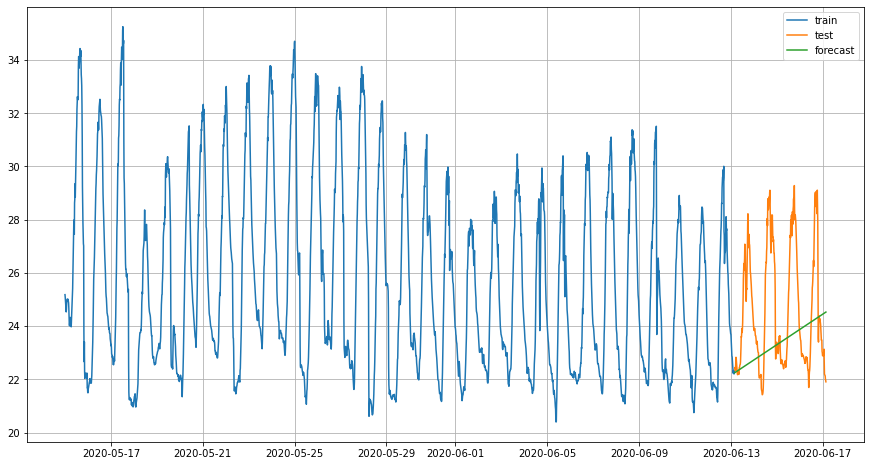

In [88]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [89]:
print("MAE:",MAE(test['AMBIENT_TEMPERATURE'],DES_predict))
print("MAPE:",MAPE(test['AMBIENT_TEMPERATURE'],DES_predict))

MAE: 1.9923965412180993
MAPE: 7.65438639601926


##### Triple Exponential Smoothing

In [130]:
TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated',seasonal_periods=84)
TES_model = TES.fit(smoothing_level=0.8900,
                   smoothing_trend=1,
                   smoothing_seasonal=0.000000001)
TES_model.summary()

Dep. Variable:,AMBIENT_TEMPERATURE,No. Observations:,2800
Model:,ExponentialSmoothing,SSE,460.097
Optimized:,True,AIC,-4880.624
Trend:,Additive,BIC,-4358.135
Seasonal:,Additive,AICC,-4874.578
Seasonal Periods:,84,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,14:33:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8900000,alpha,False
smoothing_trend,1.0000000,beta,False


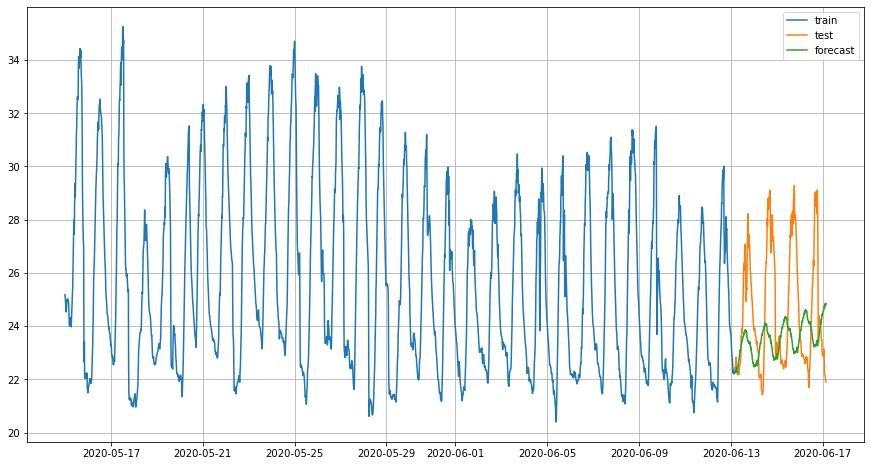

In [131]:
TES_predict = TES_model.forecast(len(test))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [132]:
print("MAE:",MAE(test['AMBIENT_TEMPERATURE'],TES_predict))
print("MAPE:",MAPE(test['AMBIENT_TEMPERATURE'],TES_predict))

MAE: 2.084148691843877
MAPE: 8.069105845490594


##### ACF and PACF plots

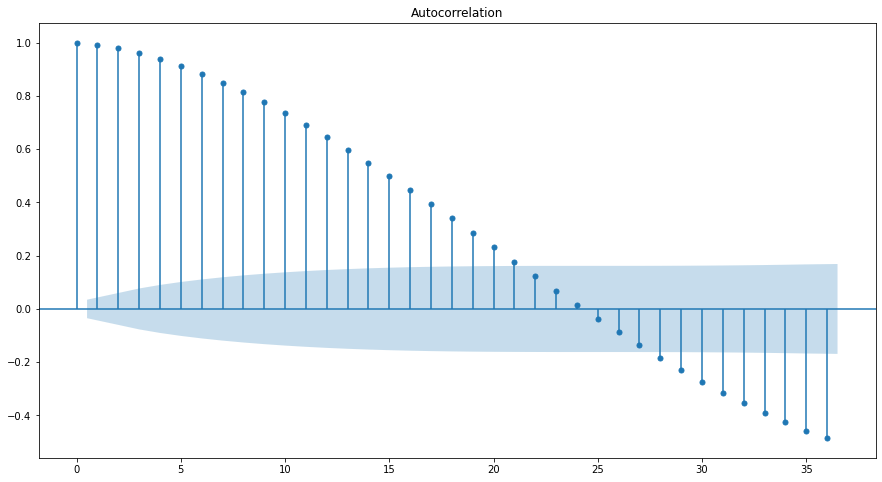

In [133]:
plot_acf(df)
plt.show()

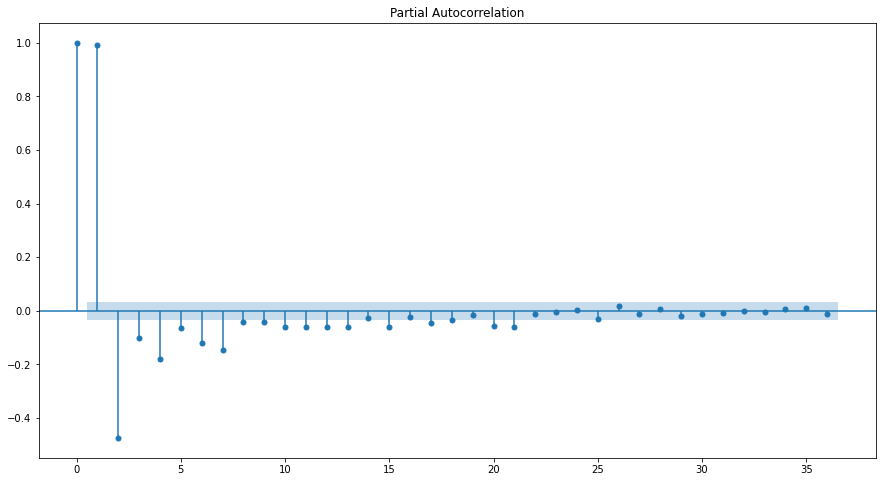

In [134]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [135]:
observations = df.values
df_results = adfuller(observations)
df_results

(-13.683582041437809,
 1.3858180533477533e-25,
 20,
 3161,
 {'1%': -3.432420426540509,
  '5%': -2.8624547875535526,
  '10%': -2.56725696255705},
 2152.9490896316847)

In [187]:
##### Stationary series -- proceed with ARMA model

##### ARMA Model

In [136]:
model=ARMA(train,(5,5))
model_fit=model.fit()
print(model_fit.summary())

                               ARMA Model Results                              
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                 2800
Model:                      ARMA(5, 5)   Log Likelihood                -976.329
Method:                        css-mle   S.D. of innovations              0.343
Date:                 Sat, 02 Apr 2022   AIC                           1976.657
Time:                         15:21:10   BIC                           2047.906
Sample:                     05-15-2020   HQIC                          2002.375
                          - 06-13-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        25.6595      0.161    159.794      0.000      25.345      25.974
ar.L1.AMBIENT_TEMPERATURE     0.5428      0.116      4.664      0.000       0.

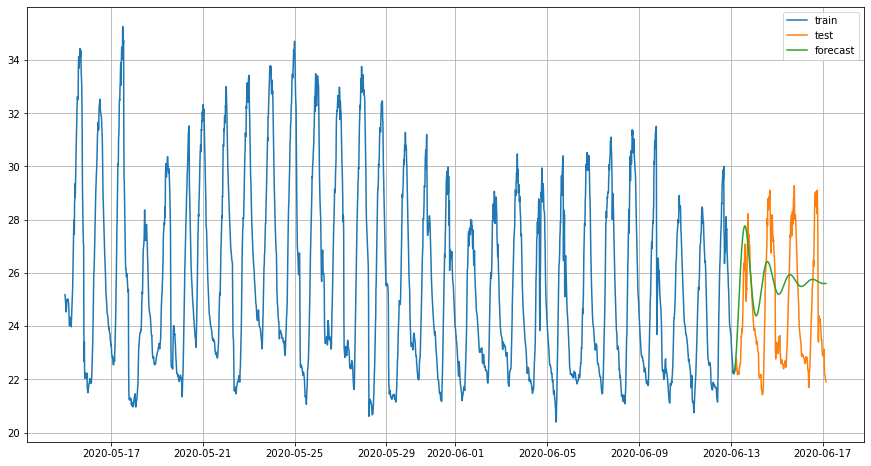

In [137]:
forecasted_values_arma = pd.Series(model_fit.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arma,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [138]:
print("MAE:",MAE(test['AMBIENT_TEMPERATURE'],forecasted_values_arma))
print("MAPE:",MAPE(test['AMBIENT_TEMPERATURE'],forecasted_values_arma))

MAE: 1.9811305006143882
MAPE: 8.259123204766977


In [139]:
model=ARMA(train,(15,15))
model_fit=model.fit()
print(model_fit.summary())

                               ARMA Model Results                              
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                 2800
Model:                    ARMA(15, 15)   Log Likelihood                -963.604
Method:                        css-mle   S.D. of innovations              0.341
Date:                 Sat, 02 Apr 2022   AIC                           1991.207
Time:                         15:31:00   BIC                           2181.203
Sample:                     05-15-2020   HQIC                          2059.788
                          - 06-13-2020                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         25.6440      0.167    153.819      0.000      25.317      25.971
ar.L1.AMBIENT_TEMPERATURE      0.8936      0.432      2.068      0.039     

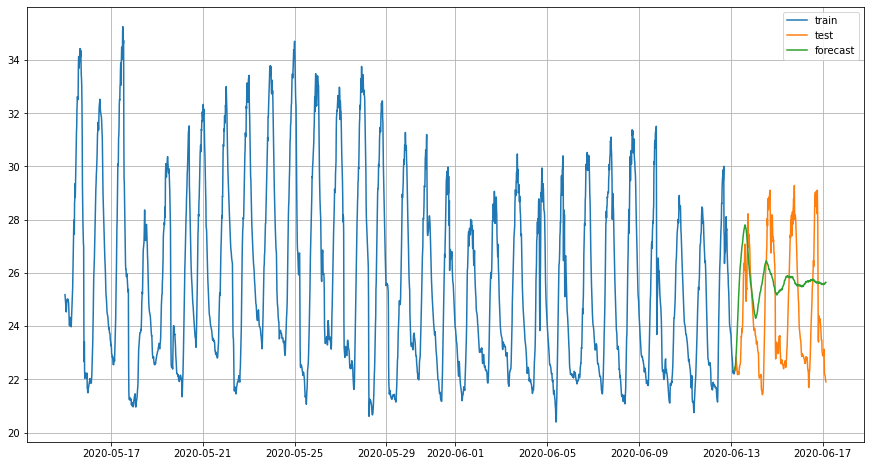

In [140]:
forecasted_values_arma = pd.Series(model_fit.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arma,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [141]:
print("MAE:",MAE(test['AMBIENT_TEMPERATURE'],forecasted_values_arma))
print("MAPE:",MAPE(test['AMBIENT_TEMPERATURE'],forecasted_values_arma))

MAE: 2.036613462538087
MAPE: 8.482397374159623


##### SARIMA Model

In [372]:
import itertools
p = q = range(1,6)
d = range(0,1)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],4) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [373]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (1, 0, 1) (1, 0, 1, 4) AIC: 2360.680965932963
SARIMAX (1, 0, 1) (1, 0, 2, 4) AIC: 2404.86844118873
SARIMAX (1, 0, 1) (1, 0, 3, 4) AIC: 2352.260777804153
SARIMAX (1, 0, 1) (1, 0, 4, 4) AIC: 2353.4998455867053
SARIMAX (1, 0, 1) (1, 0, 5, 4) AIC: 2345.917919498936
SARIMAX (1, 0, 1) (2, 0, 1, 4) AIC: 2359.1305177846916
SARIMAX (1, 0, 1) (2, 0, 2, 4) AIC: 2117.9769582313716
SARIMAX (1, 0, 1) (2, 0, 3, 4) AIC: 2379.545610160438
SARIMAX (1, 0, 1) (2, 0, 4, 4) AIC: 2349.7414727154082
SARIMAX (1, 0, 1) (2, 0, 5, 4) AIC: 2343.342320314865
SARIMAX (1, 0, 1) (3, 0, 1, 4) AIC: 2355.1650887453225
SARIMAX (1, 0, 1) (3, 0, 2, 4) AIC: 2349.6802657710696
SARIMAX (1, 0, 1) (3, 0, 3, 4) AIC: 2349.3597217527226
SARIMAX (1, 0, 1) (3, 0, 4, 4) AIC: 2355.7005594265984
SARIMAX (1, 0, 1) (3, 0, 5, 4) AIC: 2153.69699608279
SARIMAX (1, 0, 1) (4, 0, 1, 4) AIC: 2315.8056782254516
SARIMAX (1, 0, 1) (4, 0, 2, 4) AIC: 2359.5669566739552
SARIMAX (1, 0, 1) (4, 0, 3, 4) AIC: 2350.1910632064955
SARIMAX (1, 0, 1) (

ValueError: Invalid model: moving average lag(s) {4} are in both the seasonal and non-seasonal moving average components.

In [374]:
df_score.sort_values('aic')

,param,seasonal,aic
6,"(1, 0, 1)","(2, 0, 2, 4)",2117.976958
44,"(1, 0, 2)","(4, 0, 5, 4)",2139.903256
19,"(1, 0, 1)","(4, 0, 5, 4)",2140.252191
14,"(1, 0, 1)","(3, 0, 5, 4)",2153.696996
49,"(1, 0, 2)","(5, 0, 5, 4)",2162.591385
...,...,...,...
0,"(1, 0, 1)","(1, 0, 1, 4)",2360.680966
26,"(1, 0, 2)","(1, 0, 2, 4)",2377.370313
7,"(1, 0, 1)","(2, 0, 3, 4)",2379.545610
1,"(1, 0, 1)","(1, 0, 2, 4)",2404.868441


In [142]:
model = SARIMAX(train,
                       order = (1,0,1),
                       seasonal_order = (2,0,2,4),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                    AMBIENT_TEMPERATURE   No. Observations:                 2800
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 4)   Log Likelihood               -1051.988
Date:                                Sat, 02 Apr 2022   AIC                           2117.977
Time:                                        15:35:13   BIC                           2159.514
Sample:                                    05-15-2020   HQIC                          2132.973
                                         - 06-13-2020                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   2621.001      0.000       0.999       1.001
ma.

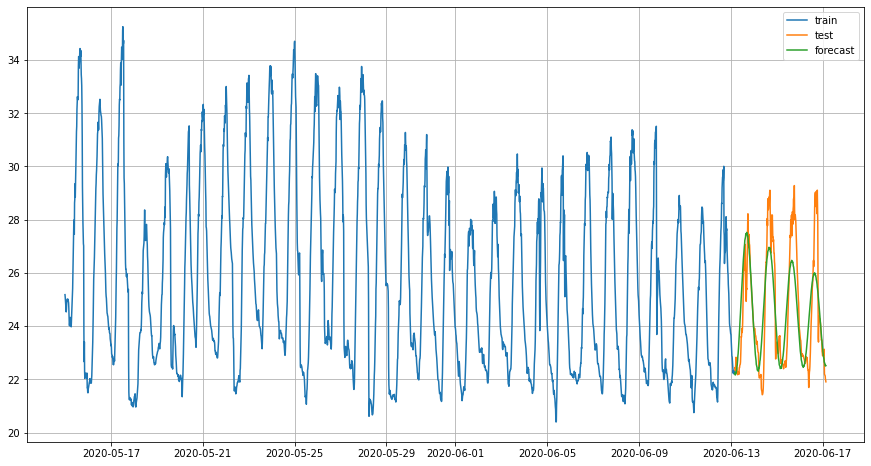

In [143]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [144]:
print("MAE:",MAE(test['AMBIENT_TEMPERATURE'],forecast))
print("MAPE:",MAPE(test['AMBIENT_TEMPERATURE'],forecast))

MAE: 1.0118792317707963
MAPE: 4.046164377363446
